### Practice Exercise (Polynomial Regression)

In [165]:
from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()
sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, DRUG_RESPONSE

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [167]:
#loading the dataframe
df = pd.read_csv(DRUG_RESPONSE)
print(f'Shape of the Dataset: {df.shape}')
print(f'Missing values in each col:\n {df.isnull().sum()}')

X = df[['Dosage_mg']].values
y = df[['Effectiveness_percent']].values

Shape of the Dataset: (18, 2)
Missing values in each col:
 Dosage_mg                0
Effectiveness_percent    0
dtype: int64


In [168]:
#spliting the training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=92)

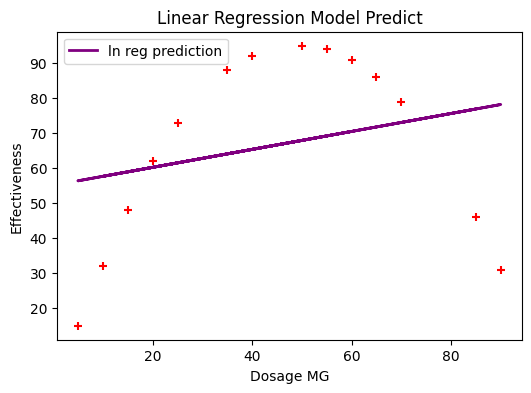

R2 score for this trained linear Regression is 0.0667


In [169]:
#appling linear regression on dataset
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
ln = LinearRegression()
ln.fit(X_train,y_train)

pred_y = ln.predict(X_train)
R2_ln = r2_score(y_train,pred_y)

plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,color='r',marker='+')
plt.plot(X_train,pred_y,color='purple',linewidth=2,label='ln reg prediction')
plt.title('Linear Regression Model Predict')
plt.ylabel('Effectiveness')
plt.xlabel('Dosage MG')
plt.legend()
plt.show()

print(f'R2 score for this trained linear Regression is {R2_ln:.4f}')

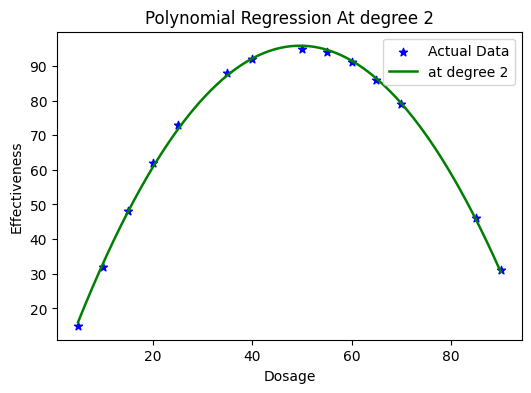

R2 score of regression model at degree 2 is 0.9991 and difference between R2 score of linear model and regression model is 0.9325


In [170]:
# Training polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
degree=2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X_train)

ln_poly = LinearRegression()
ln_poly.fit(X_poly,y_train)

poly_y_pred = ln_poly.predict(X_poly)

#for smooth visualizatino 
X_smooth = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_smooth_poly = poly.transform(X_smooth)

y_smooth_poly_pred = ln_poly.predict(X_smooth_poly)

plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train,color='blue',label='Actual Data',marker='*')
plt.plot(X_smooth,y_smooth_poly_pred,color='green',linewidth=1.8,label=f'at degree {degree}')
plt.title('Polynomial Regression At degree 2')
plt.ylabel('Effectiveness')
plt.xlabel('Dosage')
plt.legend()
plt.show()

R2_poly = r2_score(y_train,poly_y_pred)
R2_diff = R2_poly - R2_ln
print(f'R2 score of regression model at degree 2 is {R2_poly:.4f} and difference between R2 score of linear model and regression model is {R2_diff:.4f}')

In [171]:
# Maximum the effectiveness using calculus

b = ln_poly.intercept_
# b1 = ln_poly.coef_[1]
# b2 = ln_poly.coef_[1]

print(f"""
Equation = 
    y = b0 + b1.x + b2.x**2

    Therefore in our equation
    Effect = b0 + b1.Dose + b2.Dose**2

    Taking the Derivatives both sides
    d(Effect)/d(dose) = d(b0) + d(b1.Dose) + d(b2.Dose**2)
    LHS = b1 + 2b2Dose
    RHS = d(Effect) / d(dose) [Together change in effect and dose means slope]
    RHS = Slope

    -- Equation --
    Slope = b1 + 2b2.Dose [Slope is 0, at maximum]
    0 = b1 + 2b2.Dose [Filling values]
    Dose = -b1 / 2b2
""")

optimal_dose = -b1[1] / (2 * b1[2])
optimal_dose_poly = poly.transform(optimal_dose.reshape(-1,1))
max_effectiveness = ln_poly.predict(optimal_dose_poly)

print(f'Optimal Dosage for the Maximum Effective is {max_effectiveness.flatten()} at dose {optimal_dose:.4f}')

b0 = ln_poly.intercept_
b1 = ln_poly.coef_[0]  # coefficient for 





Equation = 
    y = b0 + b1.x + b2.x**2

    Therefore in our equation
    Effect = b0 + b1.Dose + b2.Dose**2

    Taking the Derivatives both sides
    d(Effect)/d(dose) = d(b0) + d(b1.Dose) + d(b2.Dose**2)
    LHS = b1 + 2b2Dose
    RHS = d(Effect) / d(dose) [Together change in effect and dose means slope]
    RHS = Slope

    -- Equation --
    Slope = b1 + 2b2.Dose [Slope is 0, at maximum]
    0 = b1 + 2b2.Dose [Filling values]
    Dose = -b1 / 2b2

Optimal Dosage for the Maximum Effective is [95.82784617] at dose 49.6265


In [172]:
# The TheRapeutic Window
print(f'ax2 + bx + c = 0')

print(f"""
Effect = b0 + b1.Dose + b2.Dose ** 2 [Rearraging the equation as per the quardatic eq]

b2.Dose^2 + b1.Dose + (b0 - Effect) = 0 [deriving formule for Dose]

This is a quadratic equation: ax² + bx + c = 0
Using quadratic formula: x = (-b ± √(b² - 4ac)) / (2a)

""")

a = b1[2]
b = b1[1]
c = b0 - 80

derive = b**2 - 4*a*c

lower_dose = (-b + np.sqrt(derive)) / (2*a)
upper_dose = (-b - np.sqrt(derive)) / (2*a)

dose_lower = (-b + np.sqrt(derive)) / (2*a)
dose_upper = (-b - np.sqrt(derive)) / (2*a)

if lower_dose > upper_dose :
    lower_dose, upper_dose = upper_dose, lower_dose




ax2 + bx + c = 0

Effect = b0 + b1.Dose + b2.Dose ** 2 [Rearraging the equation as per the quardatic eq]

b2.Dose^2 + b1.Dose + (b0 - Effect) = 0 [deriving formule for Dose]

This is a quadratic equation: ax² + bx + c = 0
Using quadratic formula: x = (-b ± √(b² - 4ac)) / (2a)




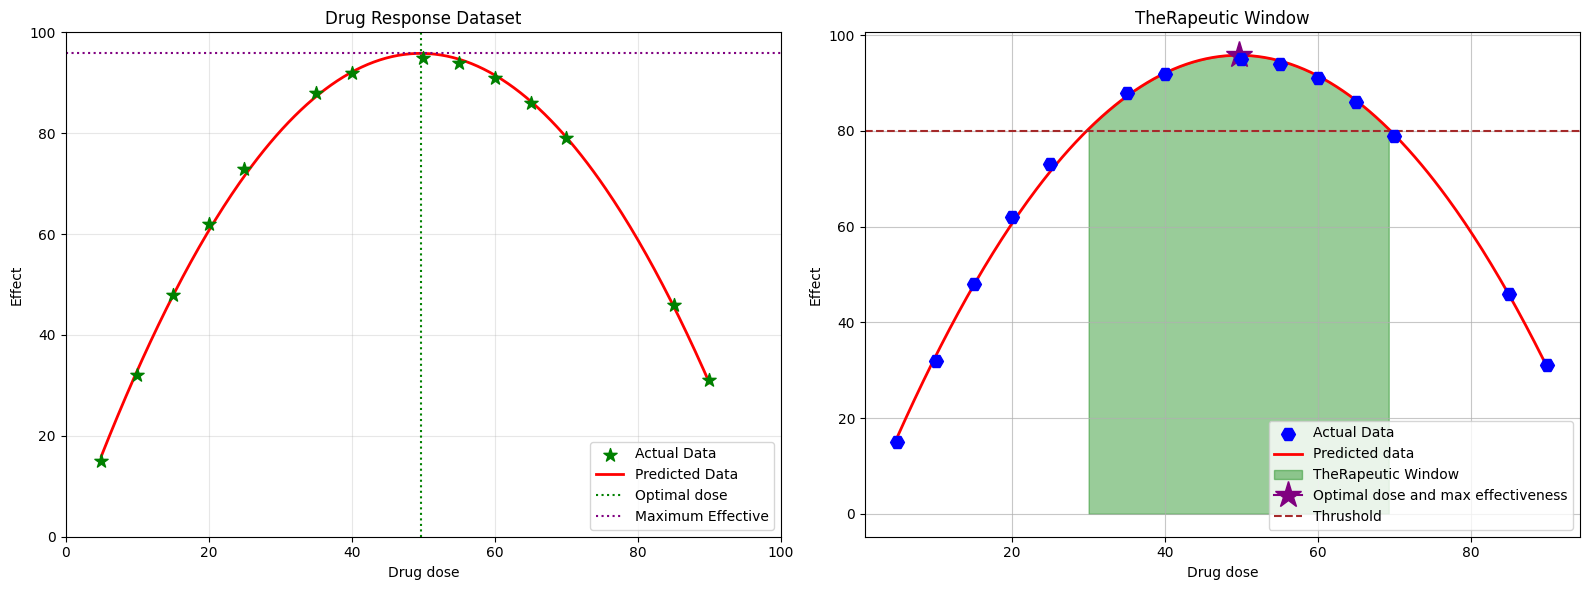

In [195]:
#### Visualization of dataset

X_train_smooth = np.linspace(X_train.min(),X_train.max(),300).reshape(-1,1)
X_train_smooth_poly = poly.transform(X_train_smooth)
y_smooth_pred = ln_poly.predict(X_train_smooth_poly)

fig ,axes = plt.subplots(1,2,figsize=(16,6))


#plot1
ax1 = axes[0]
ax1.scatter(X_train,y_train,zorder=3,color='green',s=100,label='Actual Data',marker='*')
ax1.plot(X_train_smooth,y_smooth_pred,color='r',linewidth=2,label='Predicted Data')
ax1.axvline(x = optimal_dose,color='green',label='Optimal dose',linestyle=':')
ax1.axhline(y=max_effectiveness,label='Maximum Effective',color='purple',linestyle=':')
ax1.set_title('Drug Response Dataset')
ax1.set_ylabel('Effect')
ax1.set_xlabel('Drug dose')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, 100])
ax1.set_ylim([0, 100])


#plot2
ax2 = axes[1]
ax2.scatter(X_train,y_train,color='blue',s=100,label='Actual Data',marker='H',zorder=3)
ax2.plot(X_smooth,y_smooth_pred,color='r',linewidth=2,label='Predicted data')

mask = (X_smooth.flatten() >= lower_dose) & (X_smooth.flatten() <= upper_dose)
ax2.fill_between(X_smooth.ravel()[mask],y_smooth_pred.ravel()[mask],label='TheRapeutic Window', color='green',alpha=0.4)

ax2.plot(optimal_dose, max_effectiveness, marker='*',color='purple',label='Optimal dose and max effectiveness',markersize=20)

ax2.axhline(y=80,color='brown',linestyle='--',label='Thrushold')
ax2.set_title('TheRapeutic Window')
ax2.set_ylabel('Effect')
ax2.set_xlabel('Drug dose')
ax2.grid(True,alpha=0.7)
ax2.legend(loc='lower right')



plt.tight_layout()
plt.show()